In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv('.../train.csv')
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Предобработка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Пропущенные значения присутсвуют всего в трех столбцах (Age, Cabin,Embarked)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Особенно много пропусков в "Cabin", посмотрим на значения этого столбца

In [6]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Можно, конечно, заполнить пропуски модой, но это ухудшит набор данных из большого количества пропусков (77%), поэтому лучше удалить этот столбец и не использовать в анализе.

In [7]:
data=data.drop('Cabin',axis=1)

Проверим, что переменная удалилась

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Посмотрим на переменную age

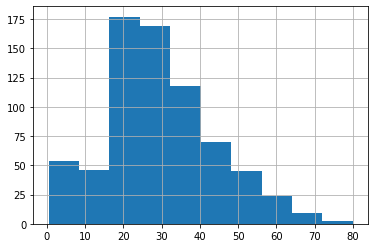

In [9]:
data.Age.hist()

In [10]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Заполним пропуски в Age медианой

In [11]:
data.Age.fillna(data.Age.median(),inplace=True)

Разберемся с двумя пропусками в Embarked

In [12]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

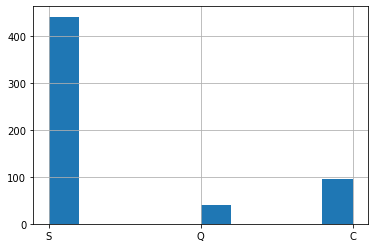

In [13]:
data.query('Sex=="male"').Embarked.hist()

Заполним два пропуска модой

In [14]:
data.Embarked.mode()

0    S
dtype: object

In [15]:
data.Embarked.fillna("S",inplace=True)

Проверим, что в данных отсутствуют пропуски

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Удалим переменные PassengerId, Name, Ticket, поскольку они никак не оказывают влияния на анализ.

In [17]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Разведочный анализ данных

Посмотрим, сколько всего людей погибло и выжило

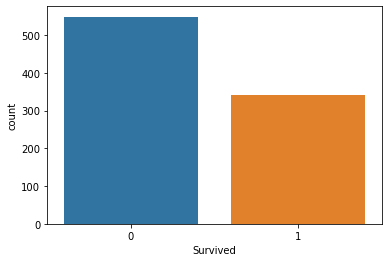

In [19]:
sns.countplot(data.Survived)

Видно, что большинство пассажиров погибло


Посмотрим теперь, как другие переменные влияют на это

**Sex**

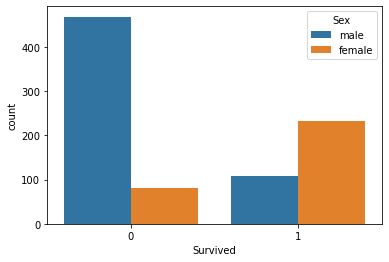

In [20]:
sns.countplot(x=data.Survived,hue=data.Sex)

Большинство женщин, однако,выжило, а вот большинство мужчин,наоборот, погибло

**Pclass**

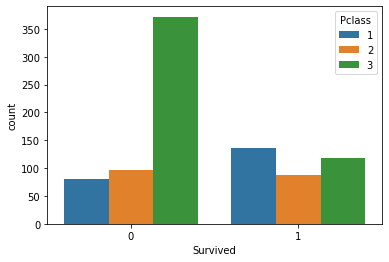

In [21]:
sns.countplot(x=data.Survived,hue=data.Pclass)

Большинство пассажиров в 1 классе выжило, во 2 классе выжило чуть менее половины, большинство 3 класса погибло

**Sex&Pclass**

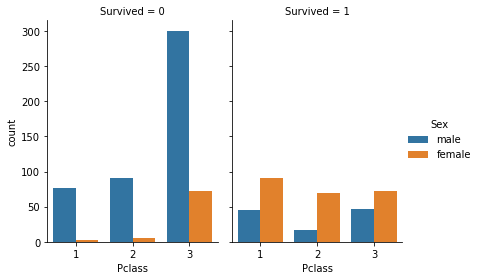

In [22]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.7)

Женщины в 1 классе - самая выжившая группа, мужчины в 3 классе - самая погибшая

**Age**

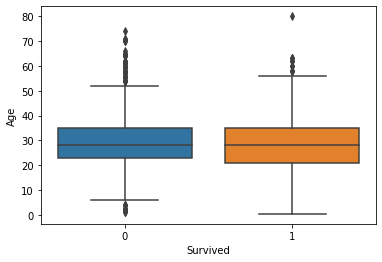

In [23]:
sns.boxplot(x='Survived',y='Age',data=data)

Большинство детей выжило, большинство пассажиров старше 60 погибло

Посмотрим на распределение переменной

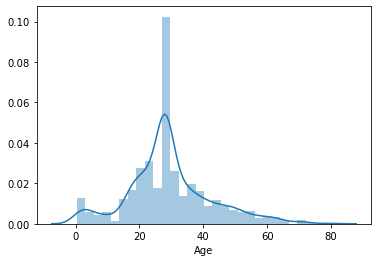

In [24]:
sns.distplot(data.Age)

**SibSp**

In [25]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

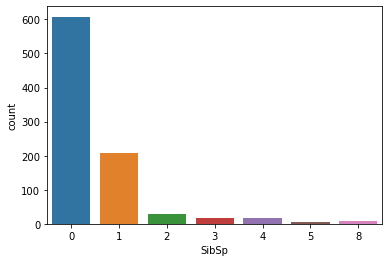

In [26]:
sns.countplot(data.SibSp)

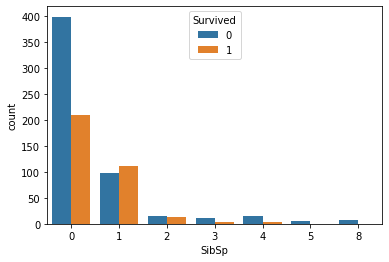

In [27]:
sns.countplot(data.SibSp,hue=data.Survived)

С нулем, одним и двумя братьями/сестрами/супругами выживали чаще, при наличии 5 и более не выживали вообще.

**Parch**

In [28]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

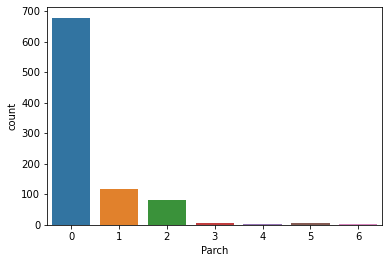

In [29]:
sns.countplot(data.Parch)

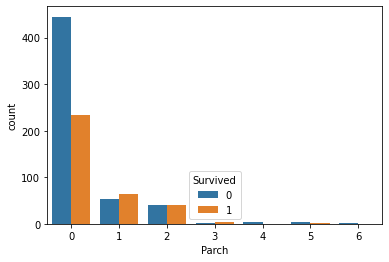

In [30]:
sns.countplot(data.Parch,hue=data.Survived)

С одним, двумя, тремя родителями/детьми выживала большая часть пассажиров

**Fare**

In [31]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

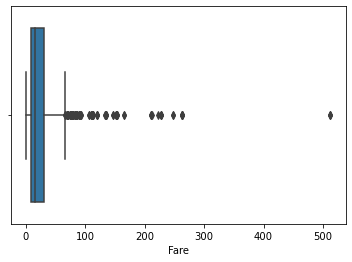

In [32]:
sns.boxplot(data.Fare)

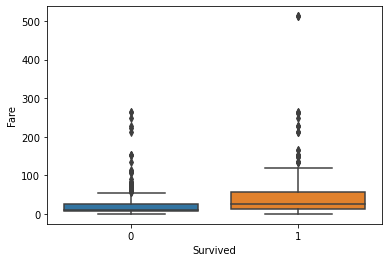

In [33]:
sns.boxplot(x='Survived',y='Fare',data=data)

In [34]:
data.query('Survived==1').Fare.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

С более дорогими тарифами у пассжиров было больше шансов выжить

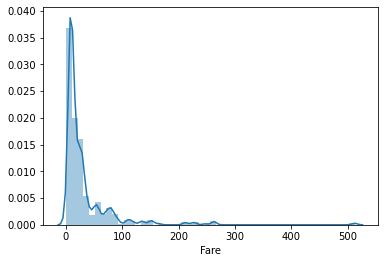

In [35]:
sns.distplot(data.Fare)

Приблизим распределение к "нормальности"

In [36]:
data['Fare']=np.log1p(data.Fare)

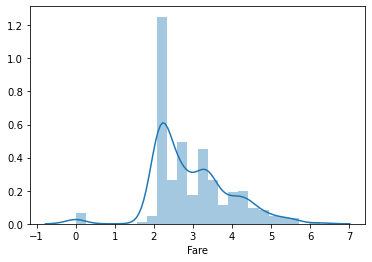

In [37]:
sns.distplot(data.Fare)

**Embarked**

In [38]:
data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

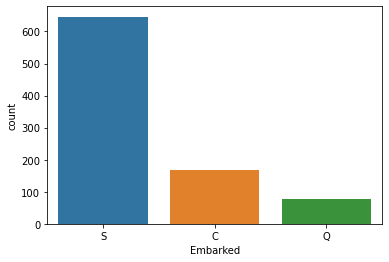

In [39]:
sns.countplot(data.Embarked)

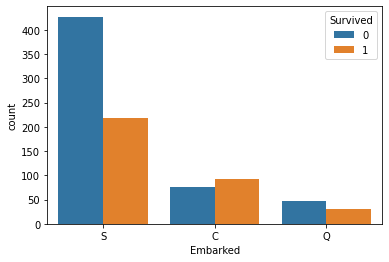

In [40]:
sns.countplot(data.Embarked,hue=data.Survived)

In [41]:
pd.pivot_table(data,index='Embarked',values='Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


Класс C  наиболее благоприятен для выживания

**Перевод категориальных данных в числовые**

In [42]:
data=pd.get_dummies(data)
data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2.110213,0,1,0,0,1
1,1,1,38.0,1,0,4.280593,1,0,1,0,0
2,1,3,26.0,0,0,2.188856,1,0,0,0,1
3,1,1,35.0,1,0,3.990834,1,0,0,0,1
4,0,3,35.0,0,0,2.202765,0,1,0,0,1


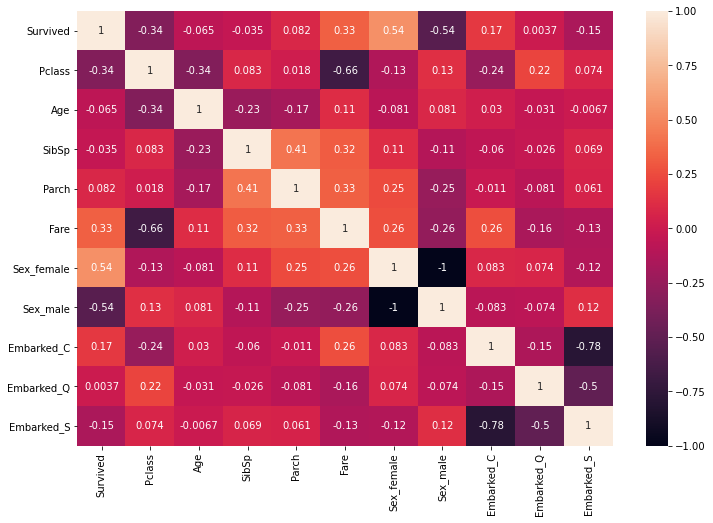

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

Целевая переменная преимущественно зависит от Pclass, Sex, Fare

# Выбор модели машинного обучения

Импортируем библиотеки

In [44]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, auc, precision_recall_curve, make_scorer

Разделим данные на обучающую и тестовую выборки

In [45]:
X=data.drop('Survived',axis=1)
y=data.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)

**Случайные леса**

In [46]:
roc_auc = make_scorer(roc_auc_score, higher_is_better=True)

rf = RandomForestClassifier(bootstrap=True, n_estimators=700, criterion='entropy')
rf.fit(X_train, y_train)

print("Best score on train data: {:.4f}".format(roc_auc_score(rf.predict(X_train), y_train)))
print("Best score on test data: {}\n".format(roc_auc_score(rf.predict(X_test), y_test)))

Best score on train data: 0.9821
Best score on test data: 0.7849656213315447



Посмотрим на важность признаков

In [47]:
for i in np.arange(len(rf.feature_importances_)):
    print("{} : {:.4f}".format(X_train.columns[i], rf.feature_importances_[i]))

Pclass : 0.0865
Age : 0.2722
SibSp : 0.0542
Parch : 0.0375
Fare : 0.2803
Sex_female : 0.1144
Sex_male : 0.1185
Embarked_C : 0.0142
Embarked_Q : 0.0082
Embarked_S : 0.0140


Age, Fare, Sex - самые важные

**Метод k ближайших соседей**

In [56]:
params={'n_neighbors' : range(1, 20), 'leaf_size' : range(1, 50)}

knn_grid = GridSearchCV(KNeighborsClassifier(), params, scoring='roc_auc')
knn_grid.fit(X_train, y_train)

print("Best GridSearchCV params: {}".format(knn_grid.best_params_))
print("Best score on train data: {:.4f}".format(knn_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(knn_grid.predict(X_test), y_test)))

Best GridSearchCV params: {'leaf_size': 2, 'n_neighbors': 6}
Best score on train data: 0.8134
Best score on test data: 0.8163497312939231



**Логистическая регрессия**

In [49]:
params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C' : [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]}

log_reg_grid = GridSearchCV(LogisticRegression(), params, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

print("Best GridSearchCV params: {}".format(log_reg_grid.best_params_))
print("Best score on train data: {:.4f}".format(log_reg_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(log_reg_grid.predict(X_test), y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

Best GridSearchCV params: {'C': 1, 'penalty': 'l2'}
Best score on train data: 0.8425
Best score on test data: 0.8005738266529633



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mod

**Результат**

Лучший результат на тестовый выборке показал алгоритм k ближайших соседей, важнейшими признаками являются Sex, Age, Fare.
